In [35]:
import numpy as np
import rasterio as rio
from rasterio.transform import from_origin
from matplotlib import pyplot as plt

In [102]:
value = 81
FIRE_ID = 'TOY'+str(value)
IN_DIR = 'data/raster_inputs_daily/'+FIRE_ID+'/'
RESOLUTION = 90

In [92]:
def get_data_file_name(data_name):
    return f'{IN_DIR}/{FIRE_ID}_{data_name}_{RESOLUTION}m.tif'

In [100]:
# === Parameters ===
num_days = 360
num_rows = 200
num_cols = 200
cell_size = RESOLUTION

# === Create data array ===
data = np.full((num_days,num_rows, num_cols), value, dtype=np.float32)
data

array([[[25., 25., 25., ..., 25., 25., 25.],
        [25., 25., 25., ..., 25., 25., 25.],
        [25., 25., 25., ..., 25., 25., 25.],
        ...,
        [25., 25., 25., ..., 25., 25., 25.],
        [25., 25., 25., ..., 25., 25., 25.],
        [25., 25., 25., ..., 25., 25., 25.]],

       [[25., 25., 25., ..., 25., 25., 25.],
        [25., 25., 25., ..., 25., 25., 25.],
        [25., 25., 25., ..., 25., 25., 25.],
        ...,
        [25., 25., 25., ..., 25., 25., 25.],
        [25., 25., 25., ..., 25., 25., 25.],
        [25., 25., 25., ..., 25., 25., 25.]],

       [[25., 25., 25., ..., 25., 25., 25.],
        [25., 25., 25., ..., 25., 25., 25.],
        [25., 25., 25., ..., 25., 25., 25.],
        ...,
        [25., 25., 25., ..., 25., 25., 25.],
        [25., 25., 25., ..., 25., 25., 25.],
        [25., 25., 25., ..., 25., 25., 25.]],

       ...,

       [[25., 25., 25., ..., 25., 25., 25.],
        [25., 25., 25., ..., 25., 25., 25.],
        [25., 25., 25., ..., 25., 25., 25.

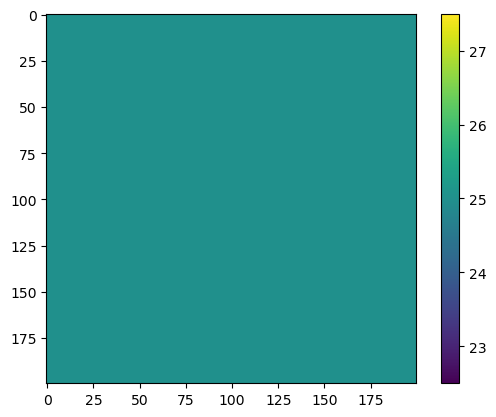

In [98]:
plt.imshow(data[0])
plt.colorbar()
plt.show()

In [104]:
output_file = get_data_file_name('firegrowth_ha')

In [101]:
output_file = get_data_file_name('firegrowth_ha')

# === Define transform (top-left corner at 0,0) ===
transform = from_origin(0, 0, cell_size, cell_size)

# === Write to GeoTIFF ===
with rio.open(
    output_file,
    'w',
    driver='GTiff',
    height=num_rows,
    width=num_cols,
    count=num_days,
    dtype='float32',
    transform=transform,
) as dst:
    dst.write(data)


In [105]:
with rio.open(output_file) as src:
    fire_growth = src.read()
fire_growth.shape

(180, 200, 200)

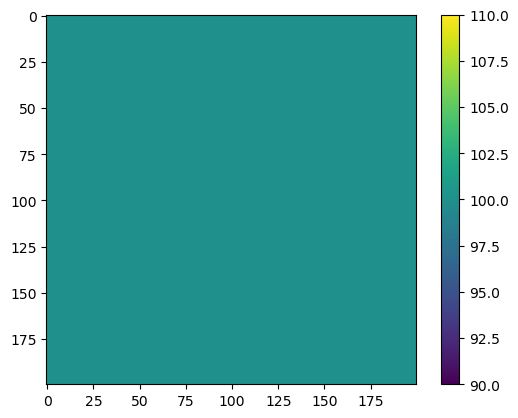

In [53]:
plt.imshow(fire_growth[0])
plt.colorbar()
plt.show()

In [54]:
fire_growth_adj = fire_growth*10000/RESOLUTION**2

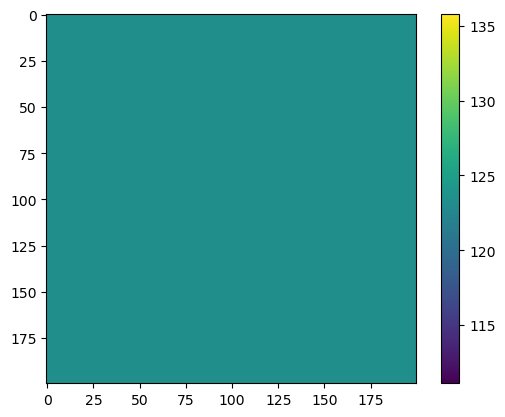

In [55]:
plt.imshow(fire_growth_adj[0])
plt.colorbar()
plt.show()

In [31]:
IGN_LOC = set([(num_rows//2, num_cols//2)])
IGN_LOC

{(50, 50)}